# WeatherPy

---


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

In [2]:
# Import citipy to determine the cities based on latitude and longitude
import citipy
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json()
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['main']
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = lats[i]
        city_lng = lngs[i]
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = citipy.nearest_city(lats[i], lngs[i]).country_code
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | noumea
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | tongliao
Processing Record 5 of Set 1 | lufilufi
Processing Record 6 of Set 1 | illoqqortoormiut
Processing Record 7 of Set 1 | san felipe
Processing Record 8 of Set 1 | lagoa
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | kasongo
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | omboue
Processing Record 13 of Set 1 | mogadishu
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | kavaratti
Processing Record 17 of Set 1 | nikolskoye
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | vostok
Processing Record 22 of Set 1 | mataura
Processing Record 23 of Set 1 | yinchuan
Processing Re

Processing Record 48 of Set 4 | jidong
Processing Record 49 of Set 4 | muisne
Processing Record 0 of Set 5 | khandyga
Processing Record 1 of Set 5 | bilibino
Processing Record 2 of Set 5 | nome
Processing Record 3 of Set 5 | sao joao da barra
Processing Record 4 of Set 5 | bokoro
Processing Record 5 of Set 5 | kabompo
Processing Record 6 of Set 5 | sao gabriel da cachoeira
Processing Record 7 of Set 5 | tselinnoye
Processing Record 8 of Set 5 | dali
Processing Record 9 of Set 5 | wildwood
Processing Record 10 of Set 5 | grand river south east
Processing Record 11 of Set 5 | hualmay
Processing Record 12 of Set 5 | narsaq
Processing Record 13 of Set 5 | moron
Processing Record 14 of Set 5 | souillac
Processing Record 15 of Set 5 | tsiroanomandidy
Processing Record 16 of Set 5 | nishihara
Processing Record 17 of Set 5 | grandview
Processing Record 18 of Set 5 | marang
Processing Record 19 of Set 5 | saint-louis
Processing Record 20 of Set 5 | namibe
Processing Record 21 of Set 5 | east lo

Processing Record 46 of Set 8 | kousseri
Processing Record 47 of Set 8 | lompoc
Processing Record 48 of Set 8 | kemijarvi
Processing Record 49 of Set 8 | yabrud
Processing Record 0 of Set 9 | zhigansk
Processing Record 1 of Set 9 | fare
Processing Record 2 of Set 9 | preobrazheniye
Processing Record 3 of Set 9 | awbari
Processing Record 4 of Set 9 | mahanje
Processing Record 5 of Set 9 | kutum
Processing Record 6 of Set 9 | dingle
Processing Record 7 of Set 9 | komono
Processing Record 8 of Set 9 | boyuibe
Processing Record 9 of Set 9 | ola
Processing Record 10 of Set 9 | nemuro
Processing Record 11 of Set 9 | nizhneyansk
Processing Record 12 of Set 9 | moerai
Processing Record 13 of Set 9 | posyet
Processing Record 14 of Set 9 | half moon bay
Processing Record 15 of Set 9 | mezen
Processing Record 16 of Set 9 | ternate
Processing Record 17 of Set 9 | mafra
Processing Record 18 of Set 9 | hauterive
Processing Record 19 of Set 9 | karkaralinsk
Processing Record 20 of Set 9 | sambava
Pro

Processing Record 43 of Set 12 | alta floresta
Processing Record 44 of Set 12 | sur
Processing Record 45 of Set 12 | makueni
Processing Record 46 of Set 12 | lolua
Processing Record 47 of Set 12 | vardo
Processing Record 48 of Set 12 | huarmey
Processing Record 49 of Set 12 | evensk
Processing Record 0 of Set 13 | talnakh
Processing Record 1 of Set 13 | ca mau
Processing Record 2 of Set 13 | biak
Processing Record 3 of Set 13 | simplicio mendes
Processing Record 4 of Set 13 | panevezys
Processing Record 5 of Set 13 | el alto
Processing Record 6 of Set 13 | sretensk
Processing Record 7 of Set 13 | lensk
Processing Record 8 of Set 13 | saint-francois
Processing Record 9 of Set 13 | havoysund
Processing Record 10 of Set 13 | safaga
Processing Record 11 of Set 13 | benguela
Processing Record 12 of Set 13 | lermontovka
Processing Record 13 of Set 13 | halifax
Processing Record 14 of Set 13 | wajima
Processing Record 15 of Set 13 | maraa
Processing Record 16 of Set 13 | sataua
Processing Rec

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          628
Lat           628
Lng           628
Max Temp      628
Humidity      628
Cloudiness    628
Wind Speed    628
Country       628
Date          628
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,noumea,-28.096179,162.800220,295.94,67,0,5.44,nc,1681238094
1,busselton,-62.373461,92.281914,269.98,75,100,10.48,au,1681238094
2,hilo,24.173267,-139.677384,293.29,67,0,7.71,us,1681238095
3,tongliao,43.414821,122.789107,273.94,14,0,6.63,cn,1681238095
4,lufilufi,-2.154723,-165.291866,300.49,72,8,2.18,ws,1681238096


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,noumea,-28.096179,162.800220,295.94,67,0,5.44,nc,1681238094
1,busselton,-62.373461,92.281914,269.98,75,100,10.48,au,1681238094
2,hilo,24.173267,-139.677384,293.29,67,0,7.71,us,1681238095
3,tongliao,43.414821,122.789107,273.94,14,0,6.63,cn,1681238095
4,lufilufi,-2.154723,-165.291866,300.49,72,8,2.18,ws,1681238096


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

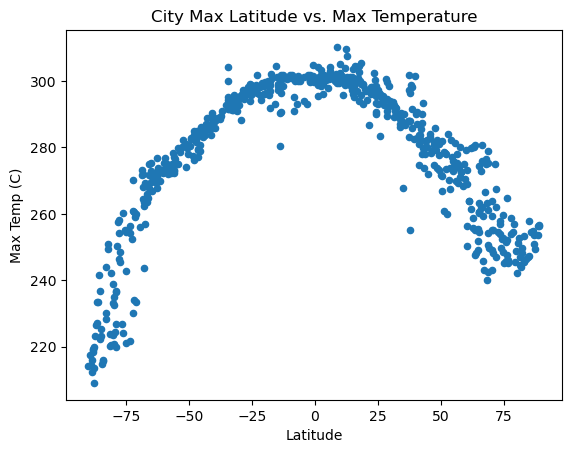

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter('Lat', 'Max Temp')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (C)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

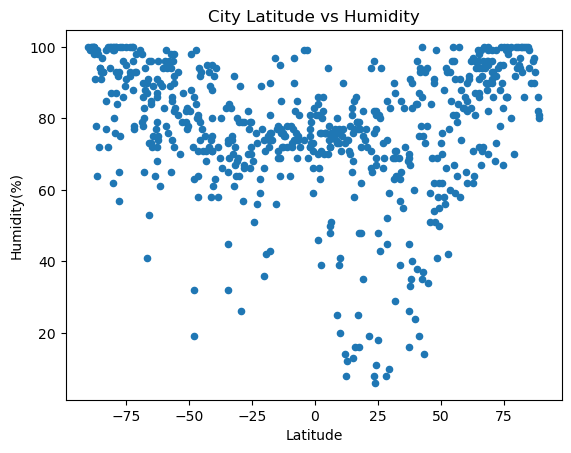

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter('Lat','Humidity')

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

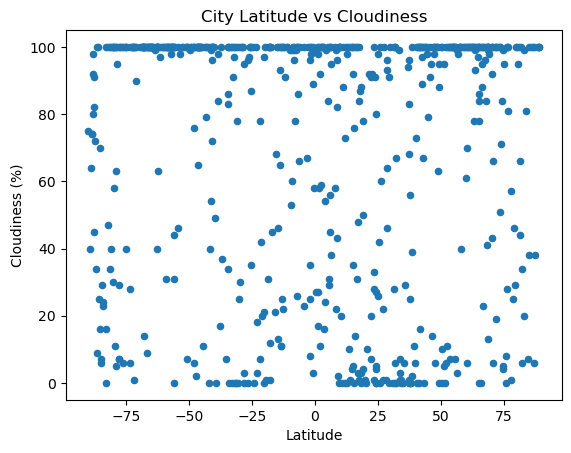

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter('Lat', 'Cloudiness')

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

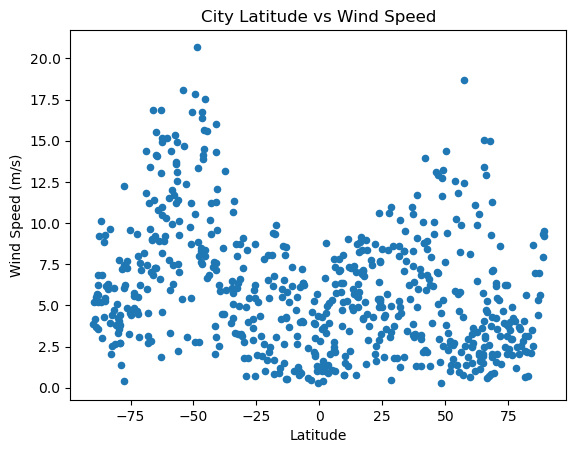

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter('Lat', 'Wind Speed')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      275.566553
1      273.256453
2      279.089226
3      280.386001
4      277.314864
          ...    
623    275.982489
624    271.857335
625    282.584450
626    274.125699
627    273.508186
Name: Lat, Length: 628, dtype: float64


In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,hilo,24.173267,-139.677384,293.29,67,0,7.71,us,1681238095
3,tongliao,43.414821,122.789107,273.94,14,0,6.63,cn,1681238095
5,illoqqortoormiut,74.495340,-24.834662,259.56,67,4,3.12,gl,1681238098
6,san felipe,30.826016,-114.178324,293.65,69,0,1.83,mx,1681238098
7,lagoa,47.238149,-26.648252,281.60,54,100,12.93,pt,1681238098


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,noumea,-28.096179,162.800220,295.94,67,0,5.44,nc,1681238094
1,busselton,-62.373461,92.281914,269.98,75,100,10.48,au,1681238094
4,lufilufi,-2.154723,-165.291866,300.49,72,8,2.18,ws,1681238096
8,rikitea,-52.931216,-139.925698,280.13,79,100,12.40,pf,1681238099
9,kasongo,-4.433803,27.118599,294.07,99,100,0.58,cd,1681238099


###  Temperature vs. Latitude Linear Regression Plot

In [16]:
# Northern Regress
x_values = northern['Lat']
y_values = northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

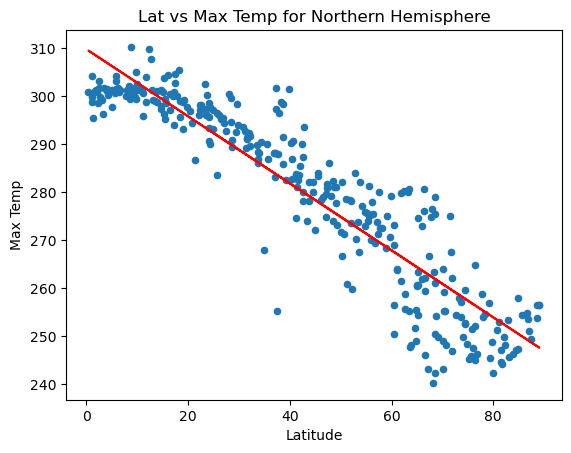

The r value is: 0.8504517061899803
The line equation is: y = -0.7x +309.81


In [17]:
# Linear regression on Northern Hemisphere
northern.plot.scatter('Lat', 'Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Lat vs Max Temp for Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.show()
print(f"The r value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

In [18]:
# Southern Regress
x_values = southern['Lat']
y_values = southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

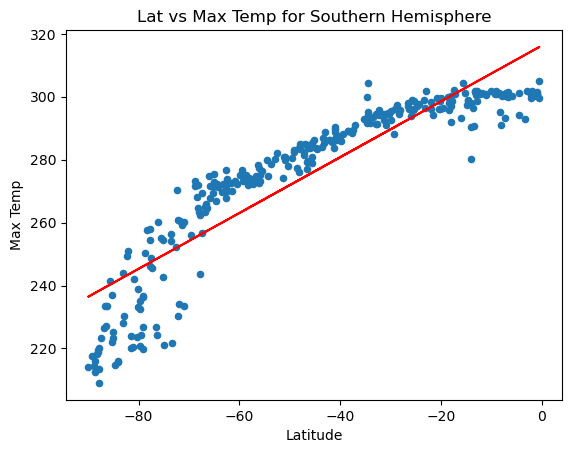

The r value is: 0.8072860637295229
The line equation is: y = 0.89x +316.23


In [19]:
# Linear regression on Southern Hemisphere
southern.plot.scatter('Lat', 'Max Temp')
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Lat vs Max Temp for Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.show()
print(f"The r value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

**Discussion about the linear relationship:** The visualizations above demonstrate that there is a strong linear relationship between Latitude and Max Temp in the Northern or Southern Hemisphere. Both data sets have a strong r-value of 0.85 for the Northern Hemisphere and 0.81 for the Southern Hemisphere.  

### Humidity vs. Latitude Linear Regression Plot

In [20]:
# Northern Regress
x_values = northern['Lat']
y_values = northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

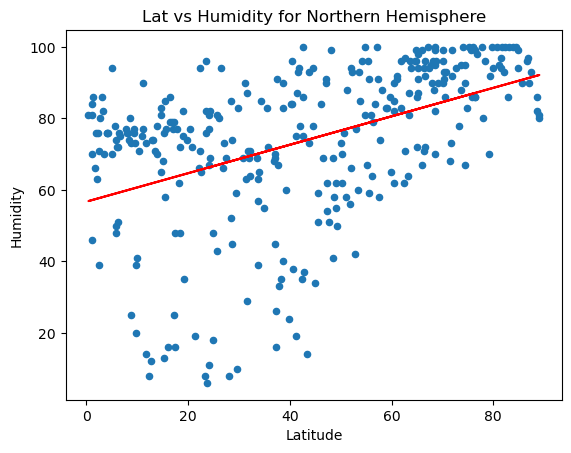

The r value is: 0.20703303603592715
The line equation is: y = 0.4x +56.72


In [21]:
# Northern Hemisphere
northern.plot.scatter('Lat', 'Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Lat vs Humidity for Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.show()
print(f"The r value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

In [22]:
# Southern Regress
x_values = southern['Lat']
y_values = southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

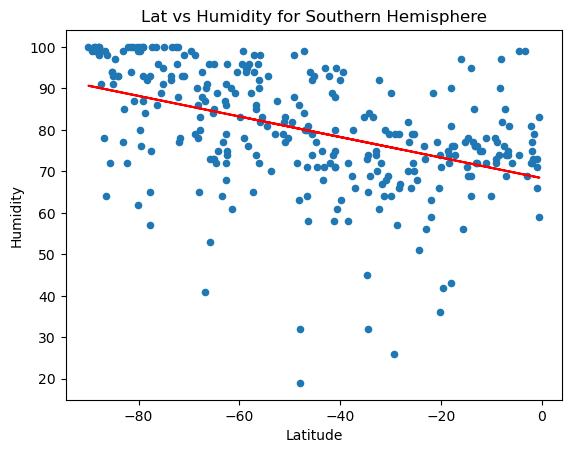

The r value is: 0.20347373090131338
The line equation is: y = -0.25x +68.38


In [23]:
# Southern Hemisphere
southern.plot.scatter('Lat', 'Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Lat vs Humidity for Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.show()
print(f"The r value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

**Discussion about the linear relationship:** There isn't a strong relationship between Latitude and Humidity for the Northern and Southern Hemisphere according to my data. Both r-values are around 0.2 which doesn't indicate a strong correlation between the 2 variables. 

### Cloudiness vs. Latitude Linear Regression Plot

In [24]:
# Northern Regress
x_values = northern['Lat']
y_values = northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

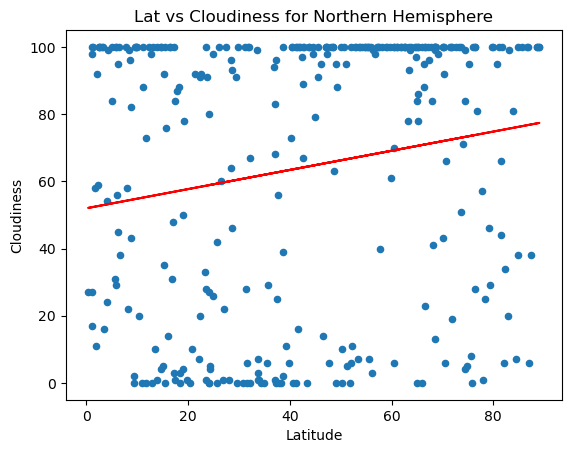

The r value is: 0.03131710338809855
The line equation is: y = 0.29x +51.99


In [25]:
# Northern Hemisphere
northern.plot.scatter('Lat', 'Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Lat vs Cloudiness for Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.show()
print(f"The r value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

In [26]:
# Southern Regress
x_values = southern['Lat']
y_values = southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

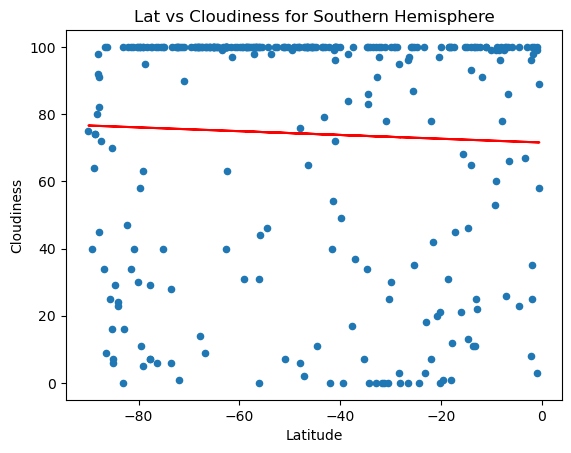

The r value is: 0.001617013965242504
The line equation is: y = -0.06x +71.55


In [27]:
# Southern Hemisphere
southern.plot.scatter('Lat', 'Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Lat vs Cloudiness for Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.show()
print(f"The r value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

**Discussion about the linear relationship:** Again, in this sample, there is not a strong correlation between latitude and cloudiness for the Northern or Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

In [28]:
# Northern Regress
x_values = northern['Lat']
y_values = northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

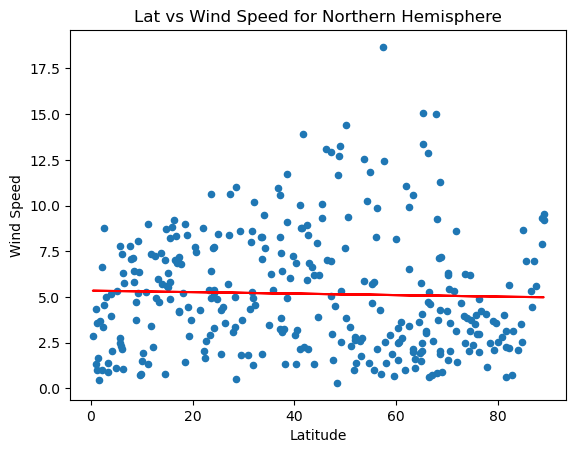

The r value is: 0.0009608545739569625
The line equation is: y = -0.0x +5.34


In [29]:
# Northern Hemisphere
northern.plot.scatter('Lat', 'Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Lat vs Wind Speed for Northern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.show()
print(f"The r value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

In [30]:
# Southern Regress
x_values = southern['Lat']
y_values = southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

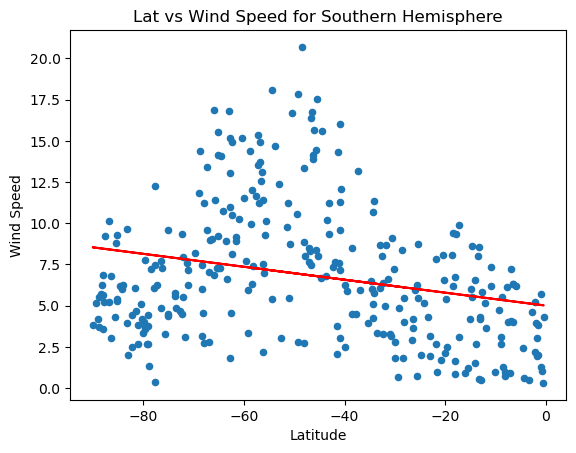

The r value is: 0.06195987248665481
The line equation is: y = -0.04x +5.0


In [31]:
# Southern Hemisphere
southern.plot.scatter('Lat', 'Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Lat vs Wind Speed for Southern Hemisphere')
plt.plot(x_values,regress_values,"r-")
plt.show()
print(f"The r value is: {rvalue**2}")
print(f"The line equation is: {line_eq}")

**Discussion about the linear relationship:** The trend is holding true for this relationship as well; there isn't a strong correlation between latitude and wind speed for the Southern or Northern Hemisphere. 